In [12]:
import sys
sys.path.append("lib")
import geopandas as gpd
import shapely as sh
from pyproj import CRS
epsg4326 = CRS.from_epsg(4326)
import pandas as pd
from progressbar import progressbar as pbar
import numpy as np
import matplotlib.pyplot as plt
from lib import osm

## load boundaries of California


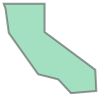

In [2]:

cc = gpd.read_file("data/CA_State_TIGER2016.shp").to_crs(epsg4326)
c = cc.geometry[0]
c = list(c.geoms)[6].simplify(tolerance=.5)
caldf = gpd.GeoDataFrame(geometry=[c], crs=epsg4326)
c

## split AOI so that OSM queries are lighter

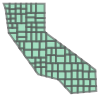

In [4]:
ao = osm.OSMAOI(c)
s = ao.geoms[1]
ao.geom

## run OSM queries

run several times until completion if any timeout

## `node`

In [5]:
ao.getobjs(objtype='node')

retrieving 98 missing objects of type node out of 98


100% (98 of 98) |########################| Elapsed Time: 0:02:43 Time:  0:02:43


In [7]:
sum([len(n.nodes) for n in ao.nodes.values()])

338616

In [8]:
n = [i for ni in ao.nodes.values() for i in ni.nodes]
gg = gpd.GeoDataFrame([ni.tags for ni in n], geometry=[sh.geometry.Point(i.lon, i.lat) for i in n], crs=epsg4326)
len(n)

338616

In [136]:
gg.to_parquet("data/california_osm_nature.parquet")

In [9]:
gcc = gg.natural.value_counts()
gcc.index = [f"{k} {v:8d}" for k,v in dict(gcc).items()]

(0.0, 10000.0)

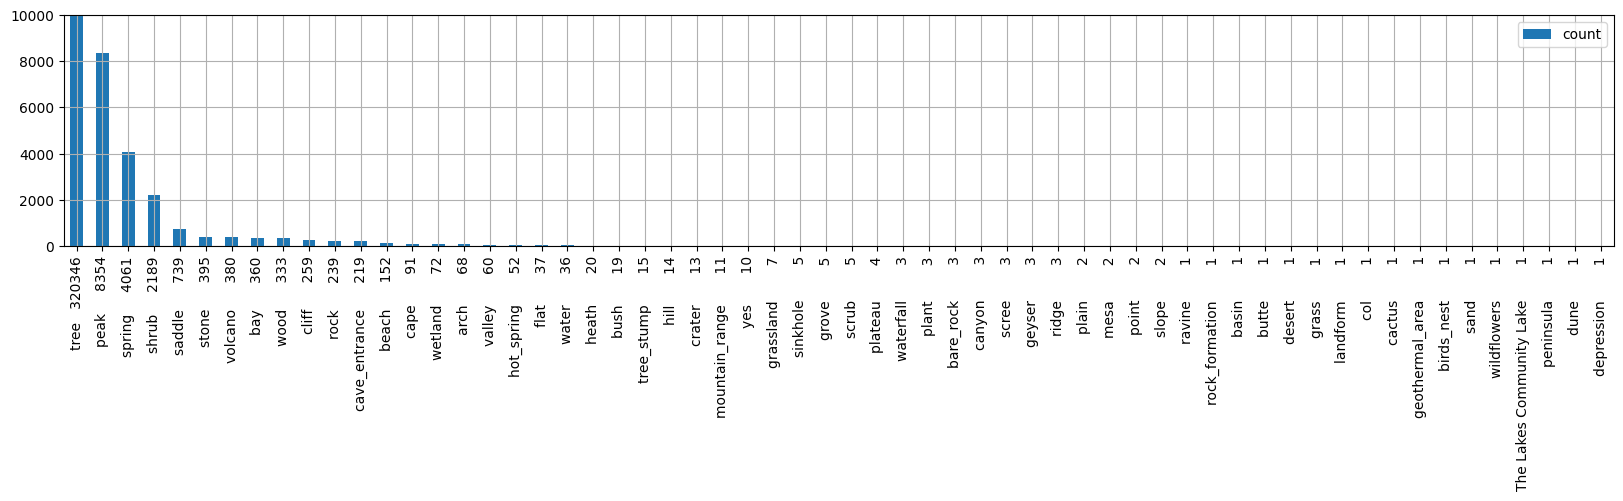

In [10]:
pd.DataFrame(gcc).plot(kind='bar', figsize=(20,3))
plt.grid()
plt.ylim(0,10000)

## `way`

In [14]:
ao.getobjs(objtype='way')

retrieving 98 missing objects of type way out of 98


100% (98 of 98) |########################| Elapsed Time: 0:04:47 Time:  0:04:47


In [17]:
sum([len(n.ways) for n in ao.nodes.values()])

0

## `rel`

In [ ]:
ao.getobjs(objtype='rel')